In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_Regression import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2]:
data =  pd.read_csv("Student_Performance.csv")

In [3]:
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [4]:
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [5]:
data.tail()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [8]:
data.dtypes

StudentID                     int64
Name                         object
Gender                       object
AttendanceRate                int64
StudyHoursPerWeek             int64
PreviousGrade                 int64
ExtracurricularActivities     int64
ParentalSupport              object
FinalGrade                    int64
dtype: object

In [9]:
data.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [10]:
data.isna().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [11]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [12]:
specific_column = ["High"]
data[data["ParentalSupport"].isin(specific_column)]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
3,4,Michael,Male,92,25,90,3,High,92
5,6,Olivia,Female,95,30,88,1,High,90
9,10,Isabella,Female,91,22,86,3,High,88


In [18]:
data[data["FinalGrade"]< 70]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
2,3,Alex,Male,78,10,65,0,Low,68
6,7,Daniel,Male,70,8,60,0,Low,62


In [19]:
data.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [26]:
data["FinalGrade"].var()

np.float64(101.95555555555555)

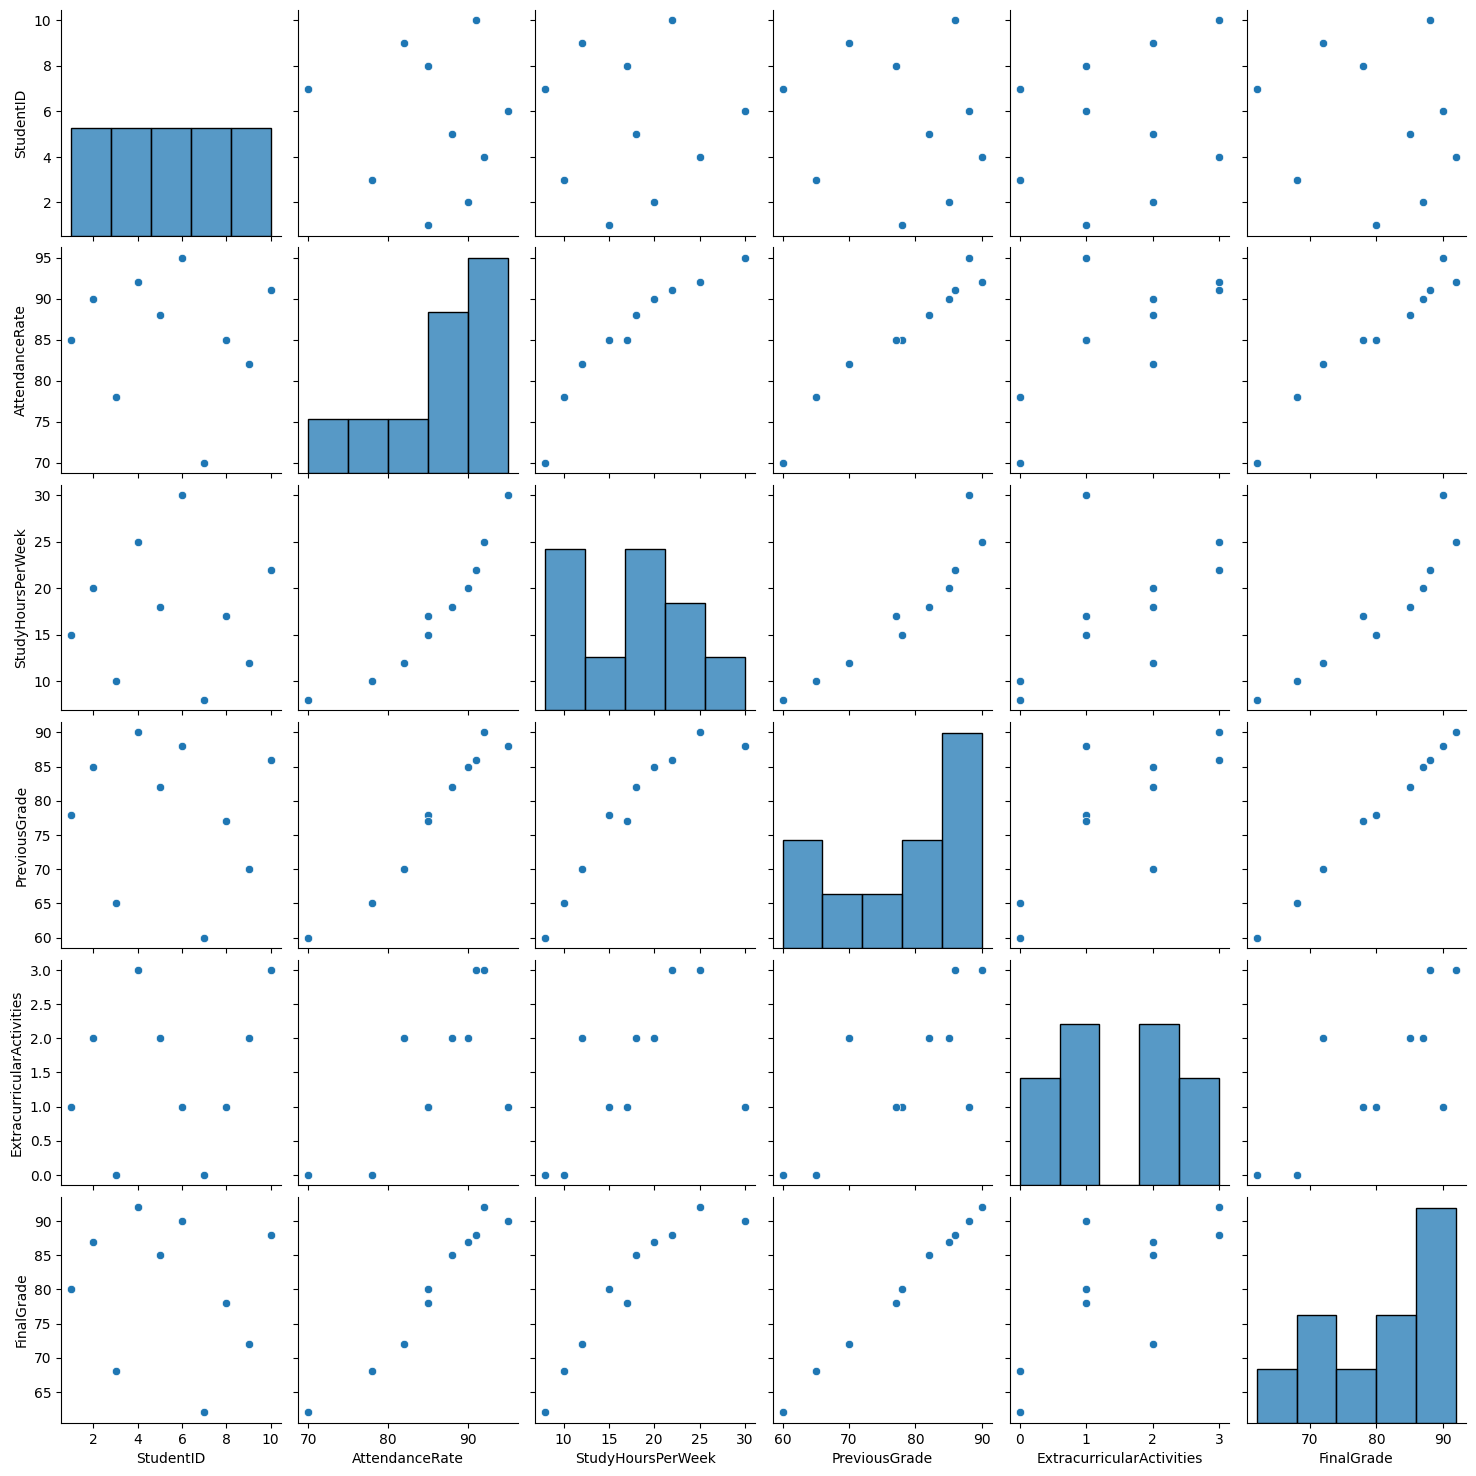

In [27]:
sns.pairplot(data)

<Axes: xlabel='AttendanceRate', ylabel='ParentalSupport'>

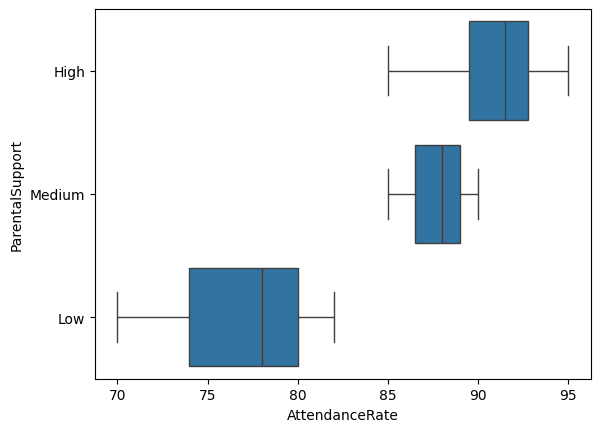

In [32]:
sns.boxplot(data=data, x = "AttendanceRate", y = "ParentalSupport")

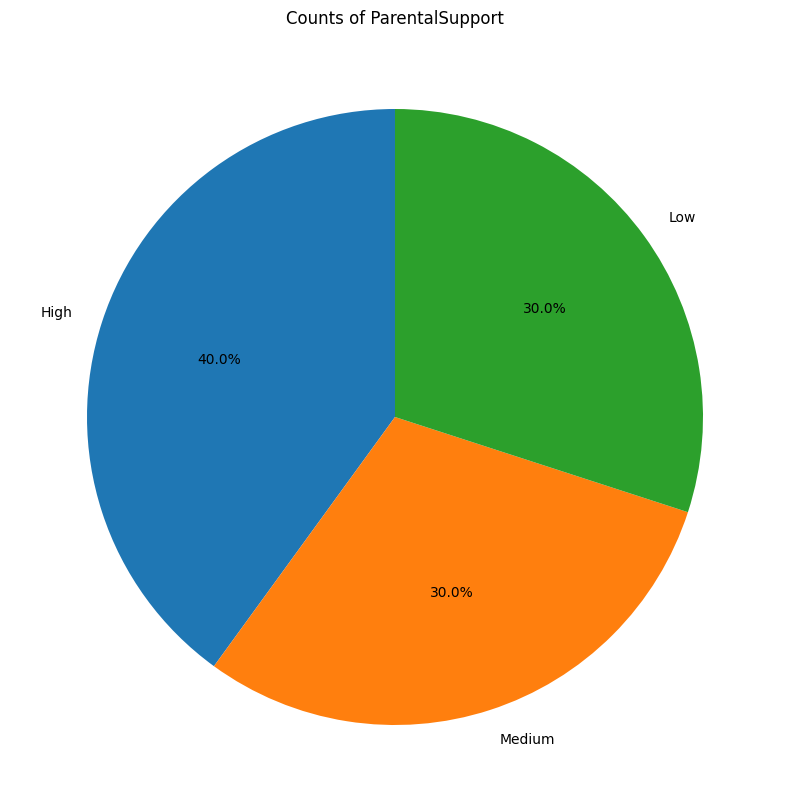

In [41]:
plt.figure(figsize = (8,12))
Counts_of_support = data["ParentalSupport"].value_counts()
plt.pie(Counts_of_support, labels = Counts_of_support.index, autopct = "%1.1f%%", startangle = 90)
plt.tight_layout()
plt.title("Counts of ParentalSupport")
plt.show()

<Axes: xlabel='AttendanceRate', ylabel='count'>

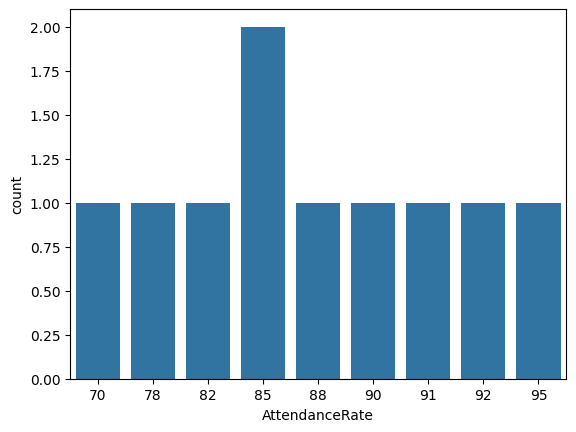

In [42]:
sns.countplot(data= data, x = "AttendanceRate")

<Figure size 800x1200 with 0 Axes>

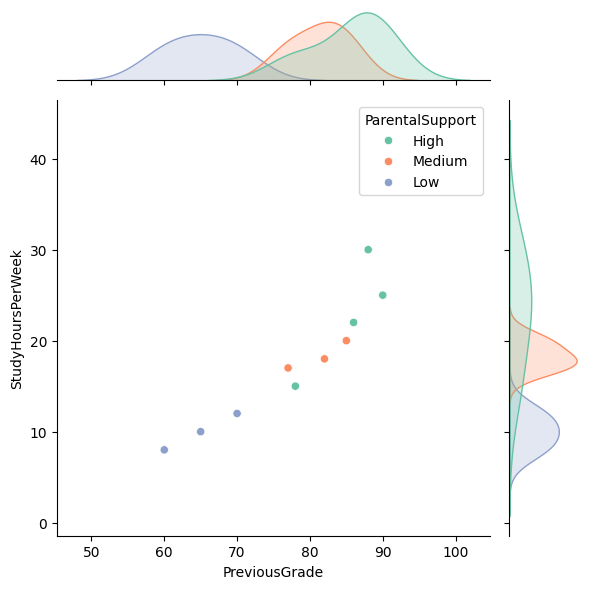

In [45]:
plt.figure(figsize =(8,12))
sns.jointplot(data = data, kind = "scatter", x = "PreviousGrade", y="StudyHoursPerWeek", hue = "ParentalSupport", palette = "Set2")
plt.tight_layout()
plt.show()

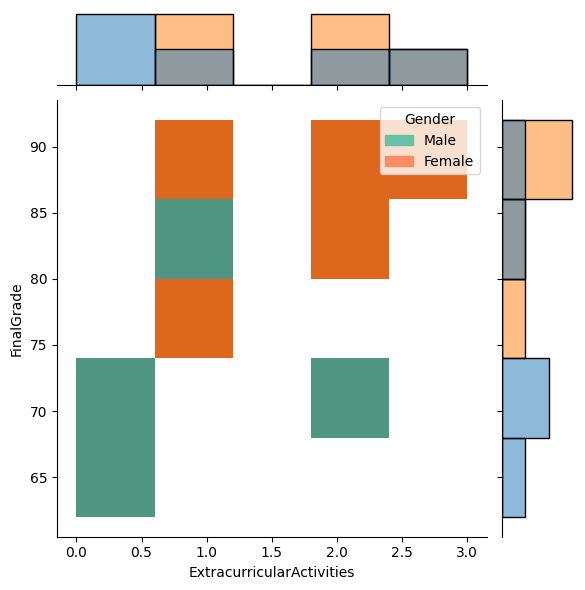

In [52]:
sns.jointplot(data=data, kind = "hist", x = "ExtracurricularActivities", y = "FinalGrade", hue = "Gender", palette = "Set2")

In [55]:
df = data.iloc[:,1:]

In [56]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85
5,Olivia,Female,95,30,88,1,High,90
6,Daniel,Male,70,8,60,0,Low,62
7,Sophia,Female,85,17,77,1,Medium,78
8,James,Male,82,12,70,2,Low,72
9,Isabella,Female,91,22,86,3,High,88


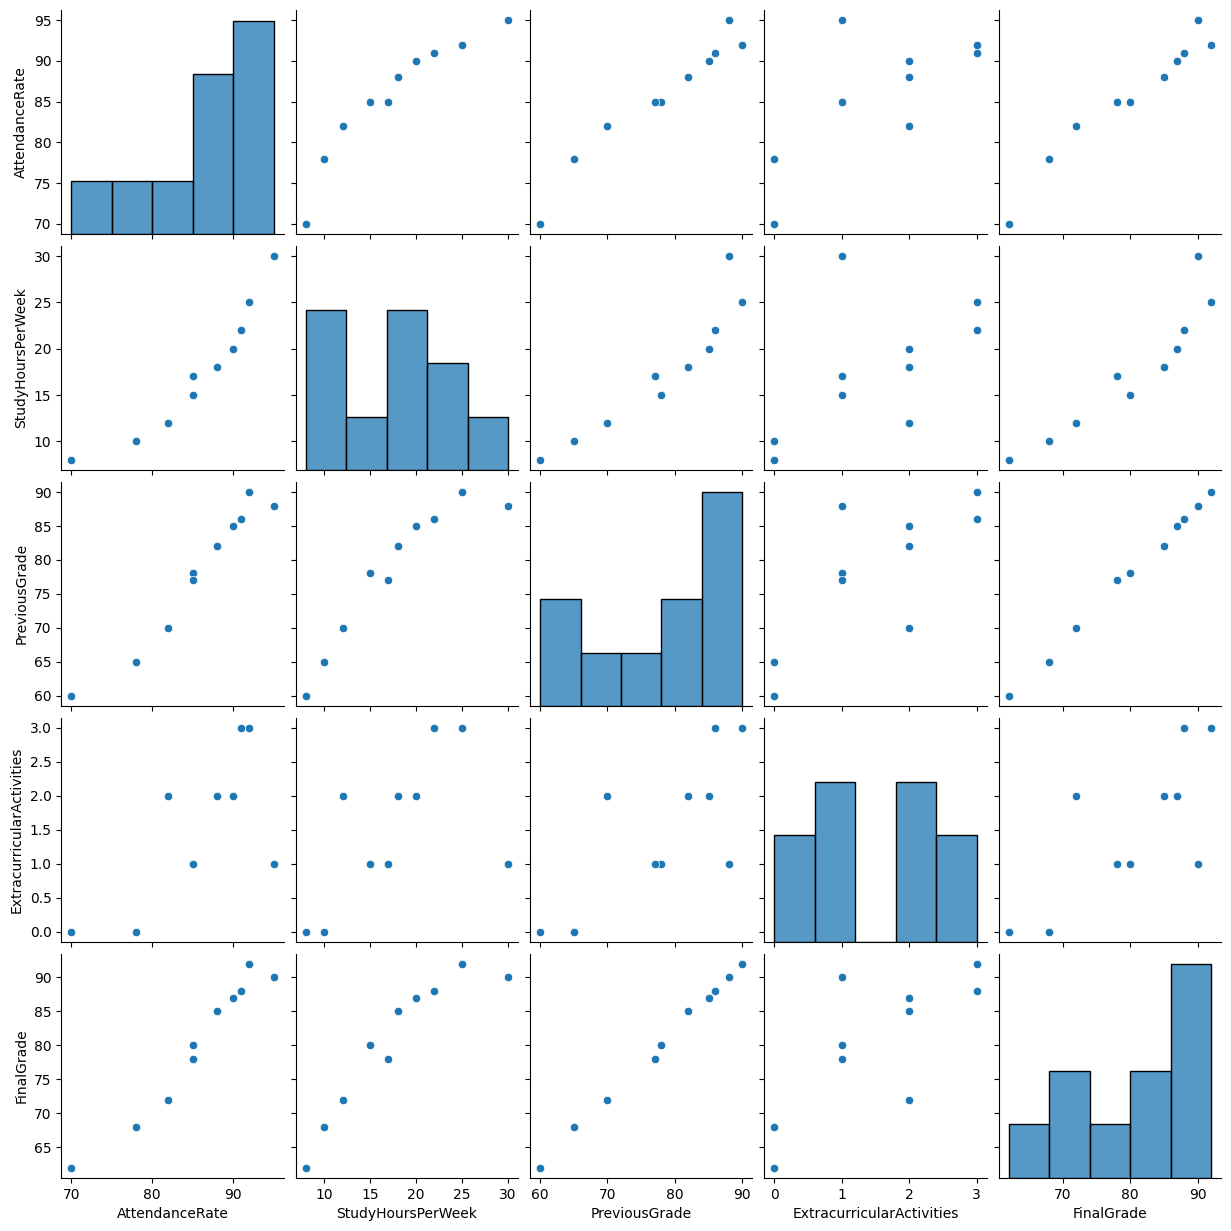

In [57]:
sns.pairplot(df)

In [58]:
df.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85


In [61]:
df["Gender"].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

In [62]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
df["Gender"] = df["Gender"].replace(["Male", "Female"], [0,1])

C:\Users\USER\AppData\Local\Temp\ipykernel_948\3590087268.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace(["Male", "Female"], [0,1])


In [64]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,0,85,15,78,1,High,80
1,Sarah,1,90,20,85,2,Medium,87
2,Alex,0,78,10,65,0,Low,68
3,Michael,0,92,25,90,3,High,92
4,Emma,1,88,18,82,2,Medium,85
5,Olivia,1,95,30,88,1,High,90
6,Daniel,0,70,8,60,0,Low,62
7,Sophia,1,85,17,77,1,Medium,78
8,James,0,82,12,70,2,Low,72
9,Isabella,1,91,22,86,3,High,88


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])

In [77]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,5,0,85,15,78,1,High,80
1,8,1,90,20,85,2,Medium,87
2,0,0,78,10,65,0,Low,68
3,6,0,92,25,90,3,High,92
4,2,1,88,18,82,2,Medium,85
5,7,1,95,30,88,1,High,90
6,1,0,70,8,60,0,Low,62
7,9,1,85,17,77,1,Medium,78
8,4,0,82,12,70,2,Low,72
9,3,1,91,22,86,3,High,88


In [78]:
le = LabelEncoder()
df["ParentalSupport"] = le.fit_transform(df["ParentalSupport"])

In [79]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,5,0,85,15,78,1,0,80
1,8,1,90,20,85,2,2,87
2,0,0,78,10,65,0,1,68
3,6,0,92,25,90,3,0,92
4,2,1,88,18,82,2,2,85
5,7,1,95,30,88,1,0,90
6,1,0,70,8,60,0,1,62
7,9,1,85,17,77,1,2,78
8,4,0,82,12,70,2,1,72
9,3,1,91,22,86,3,0,88


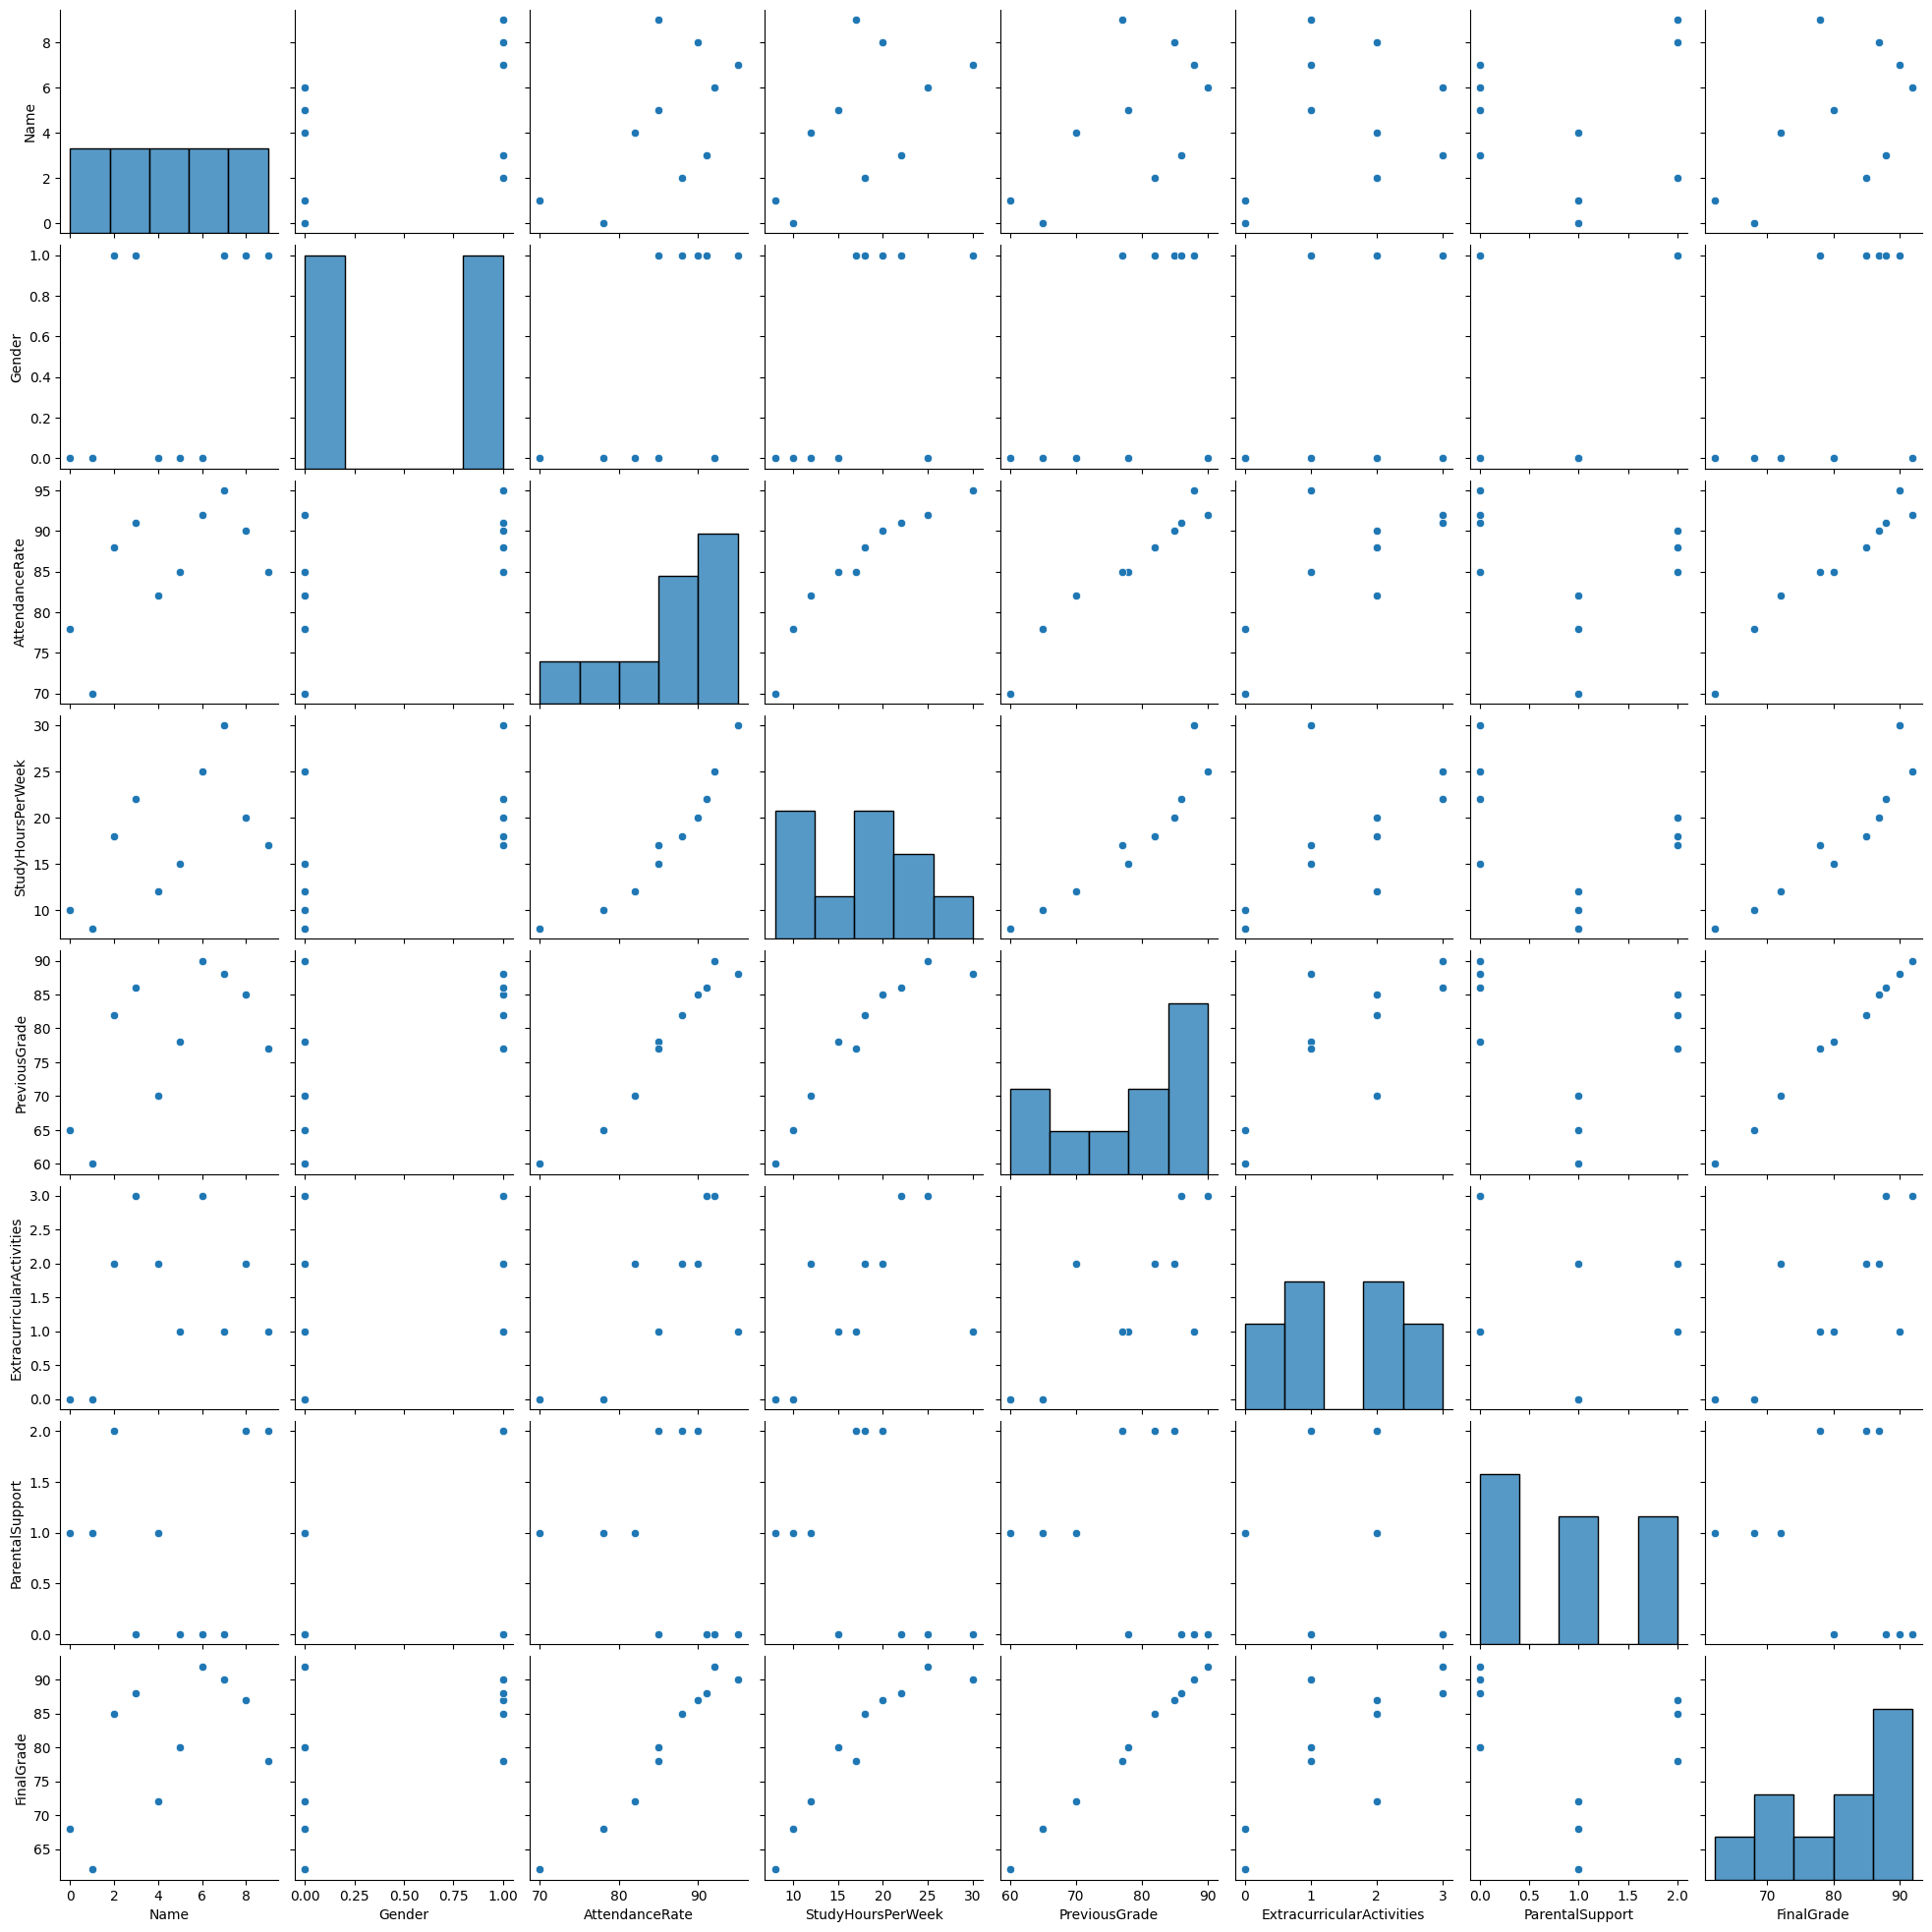

In [80]:
sns.pairplot(df)

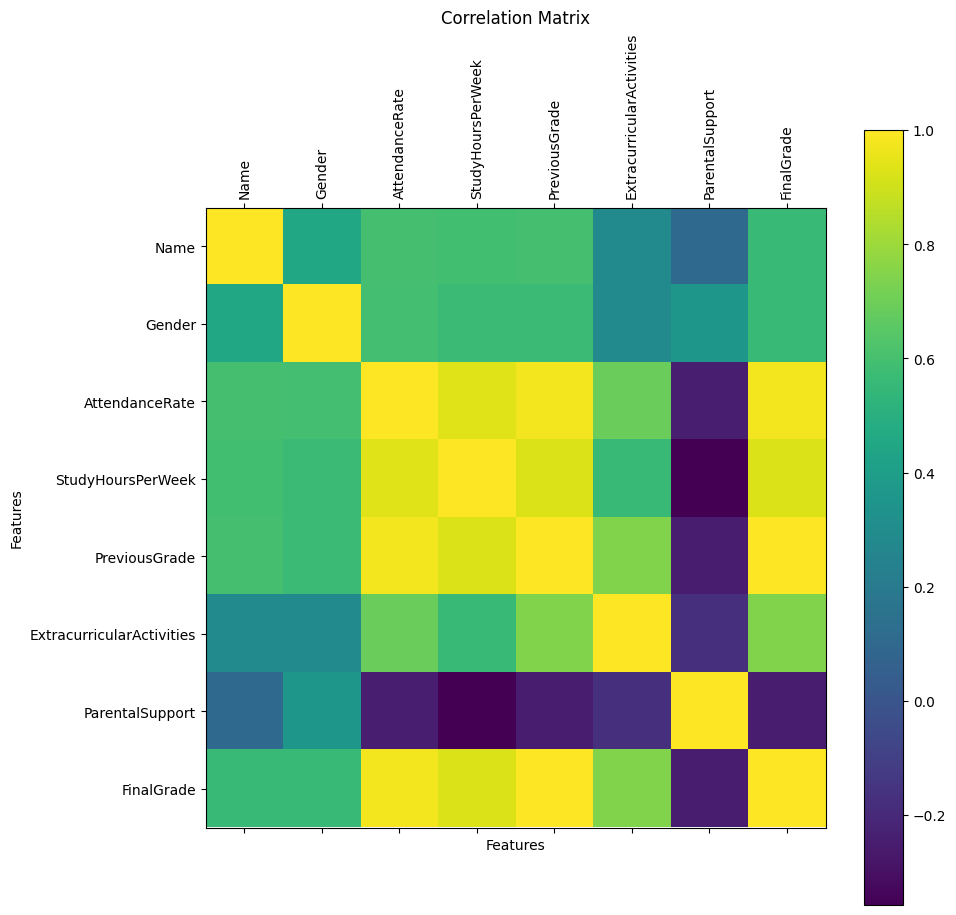

In [81]:
# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the correlation matrix heatmap
plt.matshow(df.corr())

# Set the tick labels
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns, rotation=90)

# Add a colorbar
plt.colorbar()

# Set the title and axis labels
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

In [82]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,5,0,85,15,78,1,0,80
1,8,1,90,20,85,2,2,87
2,0,0,78,10,65,0,1,68
3,6,0,92,25,90,3,0,92
4,2,1,88,18,82,2,2,85
5,7,1,95,30,88,1,0,90
6,1,0,70,8,60,0,1,62
7,9,1,85,17,77,1,2,78
8,4,0,82,12,70,2,1,72
9,3,1,91,22,86,3,0,88


In [105]:

df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,5,0,85,15,78,1,0,80
1,8,1,90,20,85,2,2,87
2,0,0,78,10,65,0,1,68
3,6,0,92,25,90,3,0,92
4,2,1,88,18,82,2,2,85
5,7,1,95,30,88,1,0,90
6,1,0,70,8,60,0,1,62
7,9,1,85,17,77,1,2,78
8,4,0,82,12,70,2,1,72
9,3,1,91,22,86,3,0,88


In [107]:
X = df.drop("FinalGrade", axis =1)

In [108]:
y = df.drop("PreviousGrade", axis = 1)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²) score: {r2}')
print(f"Mean Absolute Error(MAE):{mae}")

Mean Squared Error (MSE): 0.02128275393939178
R-squared (R²) score: 0.8567644970728235
Mean Absolute Error(MAE):0.0551337697969163


In [117]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test,pred)
r2_score = r2_score(y_test, pred)
print(f"Mean Squared Error(MSE):{mse}")
print(f"Mean Absolute Error(MAE):{mae}")
print(f"R2_score(R2S):{r2_score}")

Mean Squared Error(MSE):14.0
Mean Absolute Error(MAE):2.7142857142857144
R2_score(R2S):-1.2683531746031744


In [124]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
ensemble = RandomForestRegressor()

# Fit the model on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the test data
pred = ensemble.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R²): {r2}")


Mean Squared Error (MSE): 2.7203000000000026
Mean Absolute Error (MAE): 1.1028571428571439
R-squared Score (R²): 0.1769406964285713


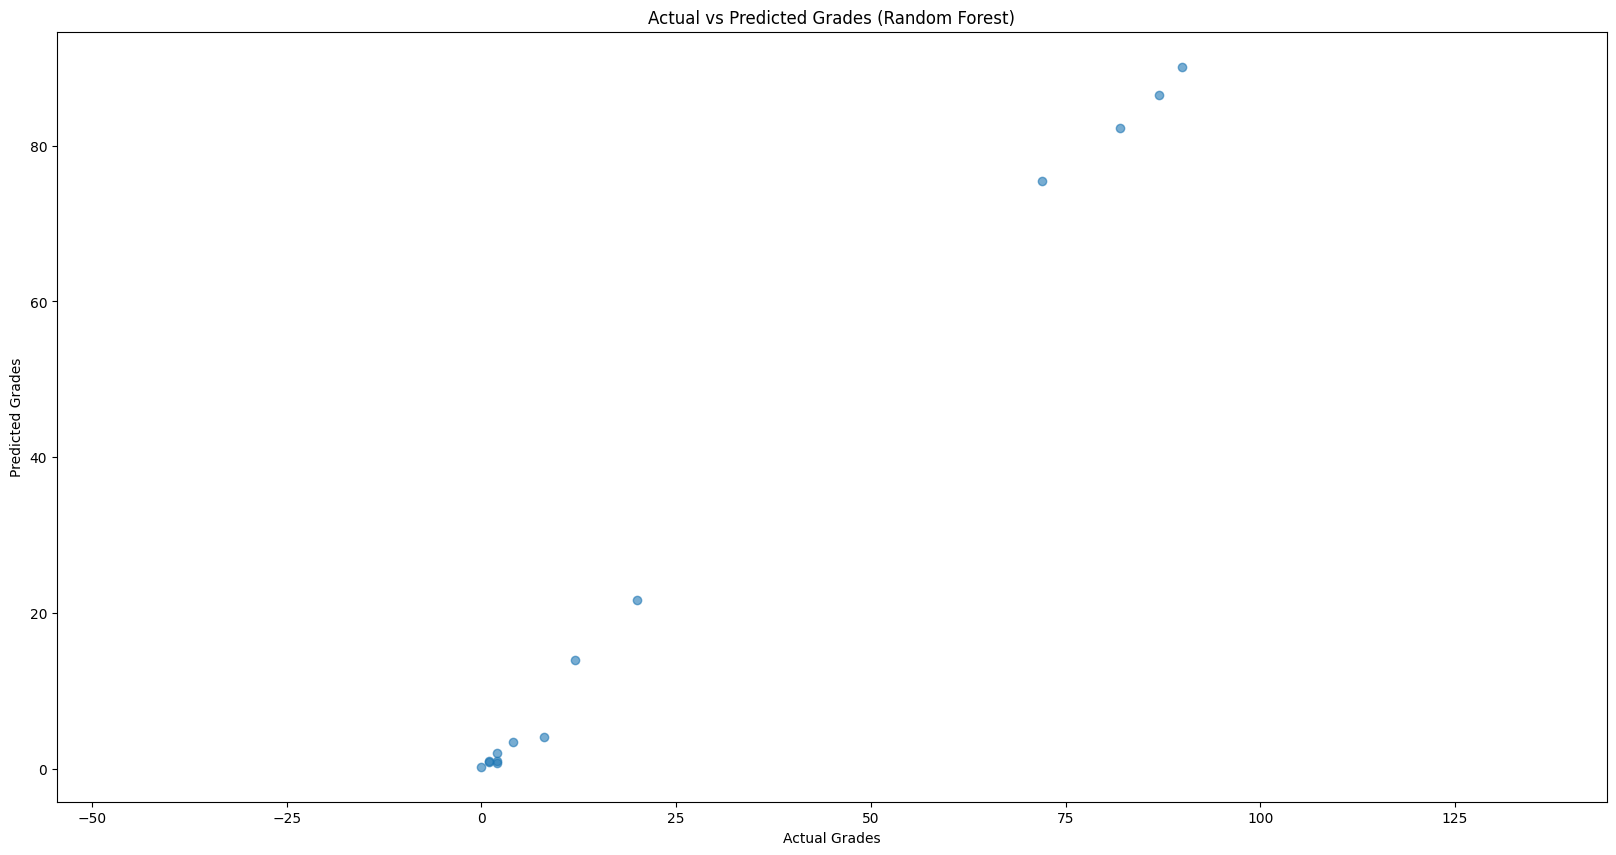

In [136]:
plt.scatter(x = y_test, y = pred, alpha =0.6)
# Set titles and labels
plt.title('Actual vs Predicted Grades (Random Forest)')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.axis('equal')  # Equal scaling for both axes

# Show the plot
plt.show()
